# Results reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skfusion import fusion
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.style.use('ggplot')

### Read existing data

In [2]:
prot_rna = np.load('../matrices/pickles/cr_z-score_raw.pkl')
secretion_prot = np.load('../matrices/pickles/signalP.pkl')
rna_expression = np.load('../matrices/pickles/MA_exp.pkl')
s4te_prot = np.load(open('../matrices/pickles/S4TE.npy', 'rb'))
OG_prot = np.load(open('../matrices/pickles/OG_prot.npy', 'rb')) # this is orthology function
rna_GO = np.load(open('../matrices/pickles/HSgene_GO.npy', 'rb'))

gproOG_prot = np.load(open('../matrices/pickles/aaprot_gprobOG.npy', 'rb'))
hsgene_gproOG = np.load(open('../matrices/pickles/hsprot_gprobOG_short.npy', 'rb'))
aaexp_prot = np.load(open('../matrices/pickles/aa_fc_expressions.npy', 'rb'))
rbp_prot = np.load(open('../matrices/pickles/RBPdomains.npy', 'rb'))
secretionexp_prot = np.load(open('../matrices/pickles/Secretedprot_exp.npy', 'rb'))

selection = prot_rna.any(axis=1)
prot_rna = prot_rna[selection,:]
secretion_prot = secretion_prot[:, selection]
s4te_prot = s4te_prot[:, selection]
OG_prot = OG_prot[:, selection]
gproOG_prot = gproOG_prot.T[:, selection]

In [3]:
results_files = ['./results_save/dfmf_reconstruct_full_kperc0.01.npy',
                 './results_save/dfmf_reconstruct_full_kperc0.025.npy',
                 './results_save/dfmf_reconstruct_full_kperc0.05.npy',
                 './results_save/dfmf_reconstruct_full_kperc0.1.npy',
                 './results_save/dfmf_reconstruct_full_kperc0.125.npy',
                 './results_save/dfmf_reconstruct_full_kperc0.15.npy']

def fetc_mat(f_idx, mat_name):
    fuser =  np.load(results_files[f_idx]).tolist() 
    return fuser.complete(fuser.fusion_graph[mat_name])
    # fuser = np.load('./results_save/dfmf_reconstruct_full_kperc0.1.npy').tolist()


##  CATRAPID RECONSTRUCTION

CatRapid Reconstruction


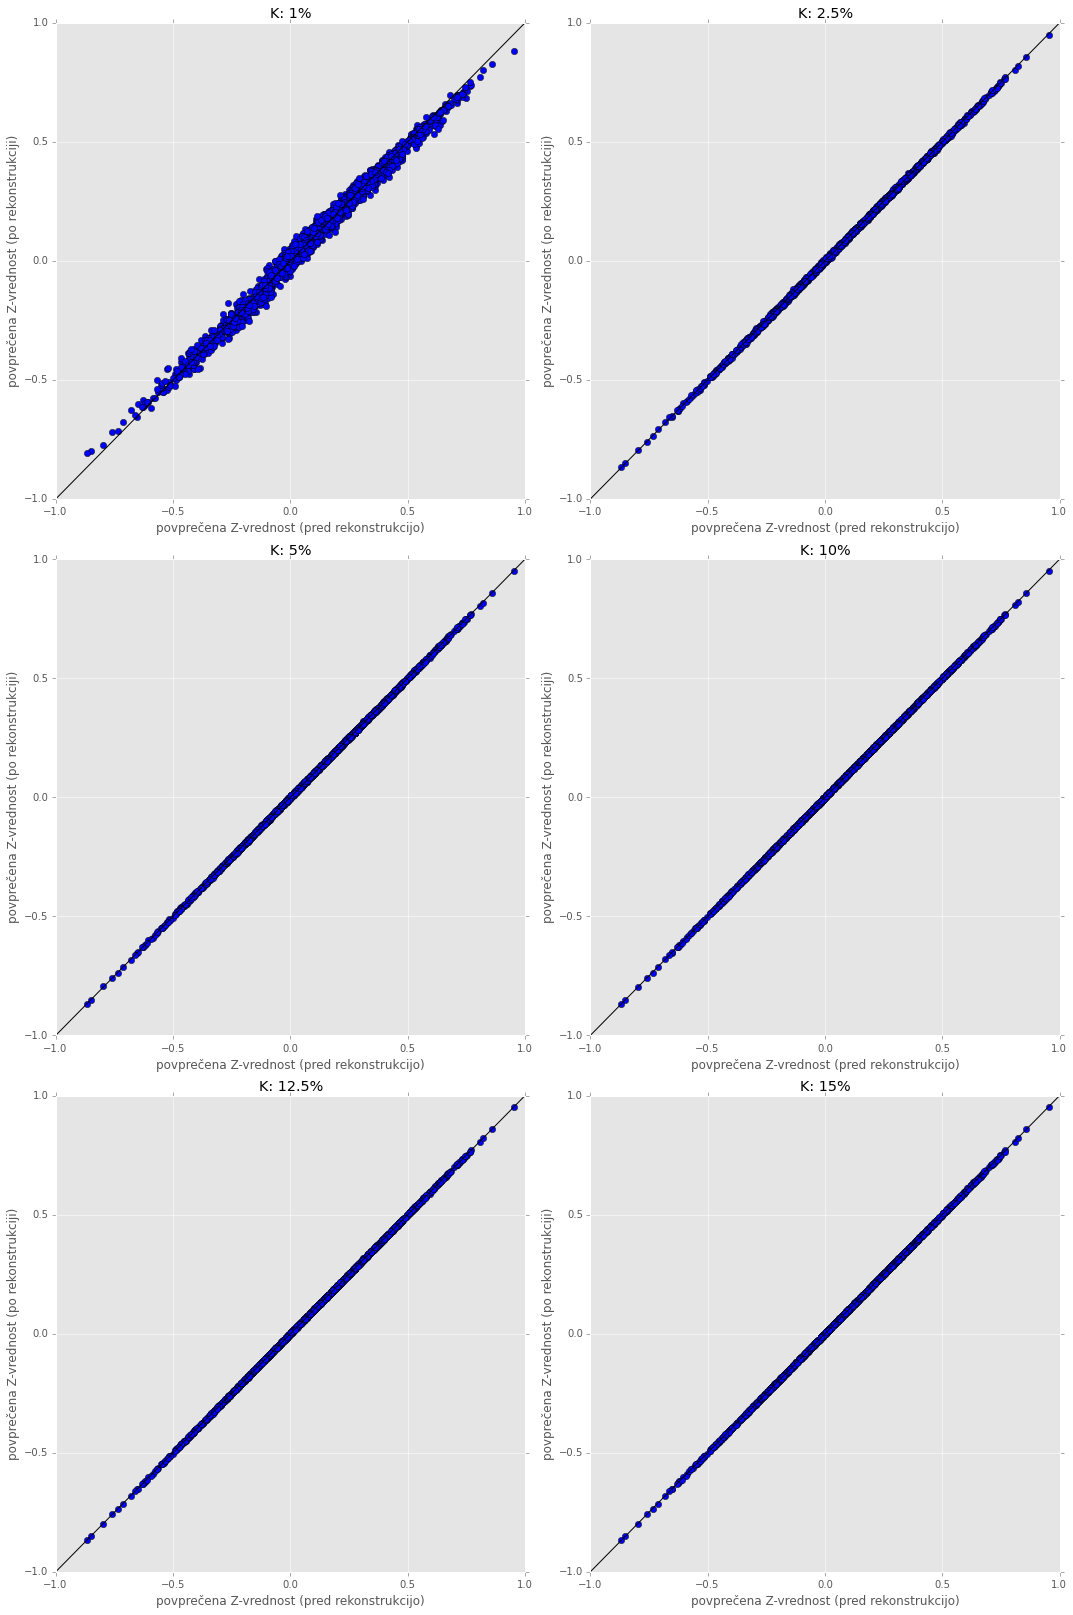

In [4]:
print('CatRapid Reconstruction')
plt.rcParams['figure.figsize'] = (15.0, 22.5)

ax = plt.subplot('321')
ax.plot(prot_rna.mean(axis=1), fetc_mat(0, 'catrapid').mean(axis=1), 'bo');
ax.set_xlabel('povprečena Z-vrednost (pred rekonstrukcijo)')
ax.set_ylabel('povprečena Z-vrednost (po rekonstrukciji)')
ax.set_title('K: 1%')
ax.plot([-1,1], [-1,1], '-k')

ax = plt.subplot('322')
ax.plot(prot_rna.mean(axis=1), fetc_mat(1, 'catrapid').mean(axis=1), 'bo', );
ax.set_xlabel('povprečena Z-vrednost (pred rekonstrukcijo)')
ax.set_ylabel('povprečena Z-vrednost (po rekonstrukciji)')
ax.set_title('K: 2.5%')
ax.plot([-1,1], [-1,1], '-k')

ax = plt.subplot('323')
ax.plot(prot_rna.mean(axis=1), fetc_mat(2, 'catrapid').mean(axis=1), 'bo', );
ax.set_xlabel('povprečena Z-vrednost (pred rekonstrukcijo)')
ax.set_ylabel('povprečena Z-vrednost (po rekonstrukciji)')
ax.set_title('K: 5%')
ax.plot([-1,1], [-1,1], '-k')

ax = plt.subplot('324')
ax.plot(prot_rna.mean(axis=1), fetc_mat(3, 'catrapid').mean(axis=1), 'bo', );
ax.set_xlabel('povprečena Z-vrednost (pred rekonstrukcijo)')
ax.set_ylabel('povprečena Z-vrednost (po rekonstrukciji)')
ax.set_title('K: 10%')
ax.plot([-1,1], [-1,1], '-k');

ax = plt.subplot('325')
ax.plot(prot_rna.mean(axis=1), fetc_mat(4, 'catrapid').mean(axis=1), 'bo', );
ax.set_xlabel('povprečena Z-vrednost (pred rekonstrukcijo)')
ax.set_ylabel('povprečena Z-vrednost (po rekonstrukciji)')
ax.set_title('K: 12.5%')
ax.plot([-1,1], [-1,1], '-k');

ax = plt.subplot('326')
ax.plot(prot_rna.mean(axis=1), fetc_mat(5, 'catrapid').mean(axis=1), 'bo', );
ax.set_xlabel('povprečena Z-vrednost (pred rekonstrukcijo)')
ax.set_ylabel('povprečena Z-vrednost (po rekonstrukciji)')
ax.set_title('K: 15%')
ax.plot([-1,1], [-1,1], '-k');
plt.tight_layout()


## SignalP reconstruction

SignalP Reconstruction


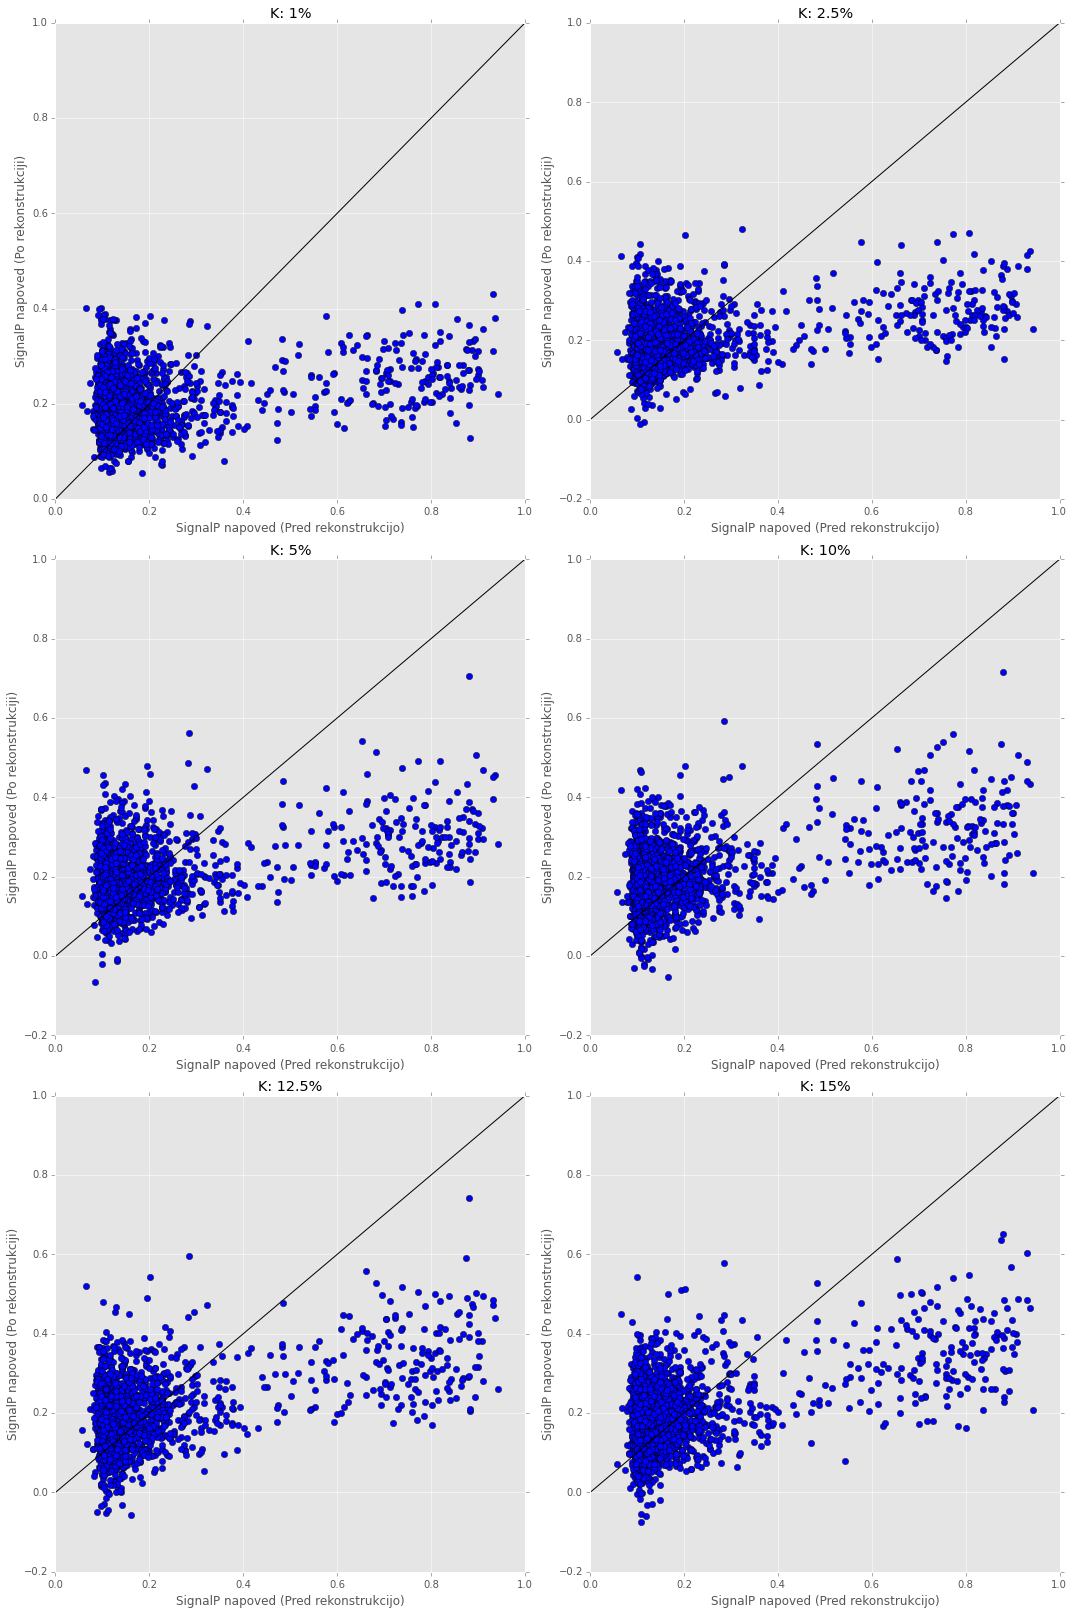

In [5]:
print('SignalP Reconstruction')
secretion_prot = secretion_prot.flatten()

ax = plt.subplot('321')
ax.plot(secretion_prot, fetc_mat(0, 'signalP')[1,:].flatten(), 'bo');
ax.set_xlabel('SignalP napoved (Pred rekonstrukcijo)')
ax.set_ylabel('SignalP napoved (Po rekonstrukciji)')
ax.set_title('K: 1%')
ax.plot([0,1], [0,1], '-k')

ax = plt.subplot('322')
ax.plot(secretion_prot, fetc_mat(1, 'signalP')[1,:].flatten(), 'bo', );
ax.set_xlabel('SignalP napoved (Pred rekonstrukcijo)')
ax.set_ylabel('SignalP napoved (Po rekonstrukciji)')
ax.set_title('K: 2.5%')
ax.plot([0,1], [0,1], '-k')

ax = plt.subplot('323')
ax.plot(secretion_prot, fetc_mat(2, 'signalP')[1,:].flatten(), 'bo', );
ax.set_xlabel('SignalP napoved (Pred rekonstrukcijo)')
ax.set_ylabel('SignalP napoved (Po rekonstrukciji)')
ax.set_title('K: 5%')
ax.plot([0,1], [0,1], '-k')

ax = plt.subplot('324')
ax.plot(secretion_prot, fetc_mat(3, 'signalP')[1,:].flatten(), 'bo', );
ax.set_xlabel('SignalP napoved (Pred rekonstrukcijo)')
ax.set_ylabel('SignalP napoved (Po rekonstrukciji)')
ax.set_title('K: 10%')
ax.plot([0,1], [0,1], '-k');

ax = plt.subplot('325')
ax.plot(secretion_prot, fetc_mat(4, 'signalP')[1,:].flatten(), 'bo', );
ax.set_xlabel('SignalP napoved (Pred rekonstrukcijo)')
ax.set_ylabel('SignalP napoved (Po rekonstrukciji)')
ax.set_title('K: 12.5%')
ax.plot([0,1], [0,1], '-k');

ax = plt.subplot('326')
ax.plot(secretion_prot, fetc_mat(5, 'signalP')[1,:].flatten(), 'bo', );
ax.set_xlabel('SignalP napoved (Pred rekonstrukcijo)')
ax.set_ylabel('SignalP napoved (Po rekonstrukciji)')
ax.set_title('K: 15%')
ax.plot([0,1], [0,1], '-k');
plt.tight_layout()

## Exprerimental Secretion

Experimental Secretion


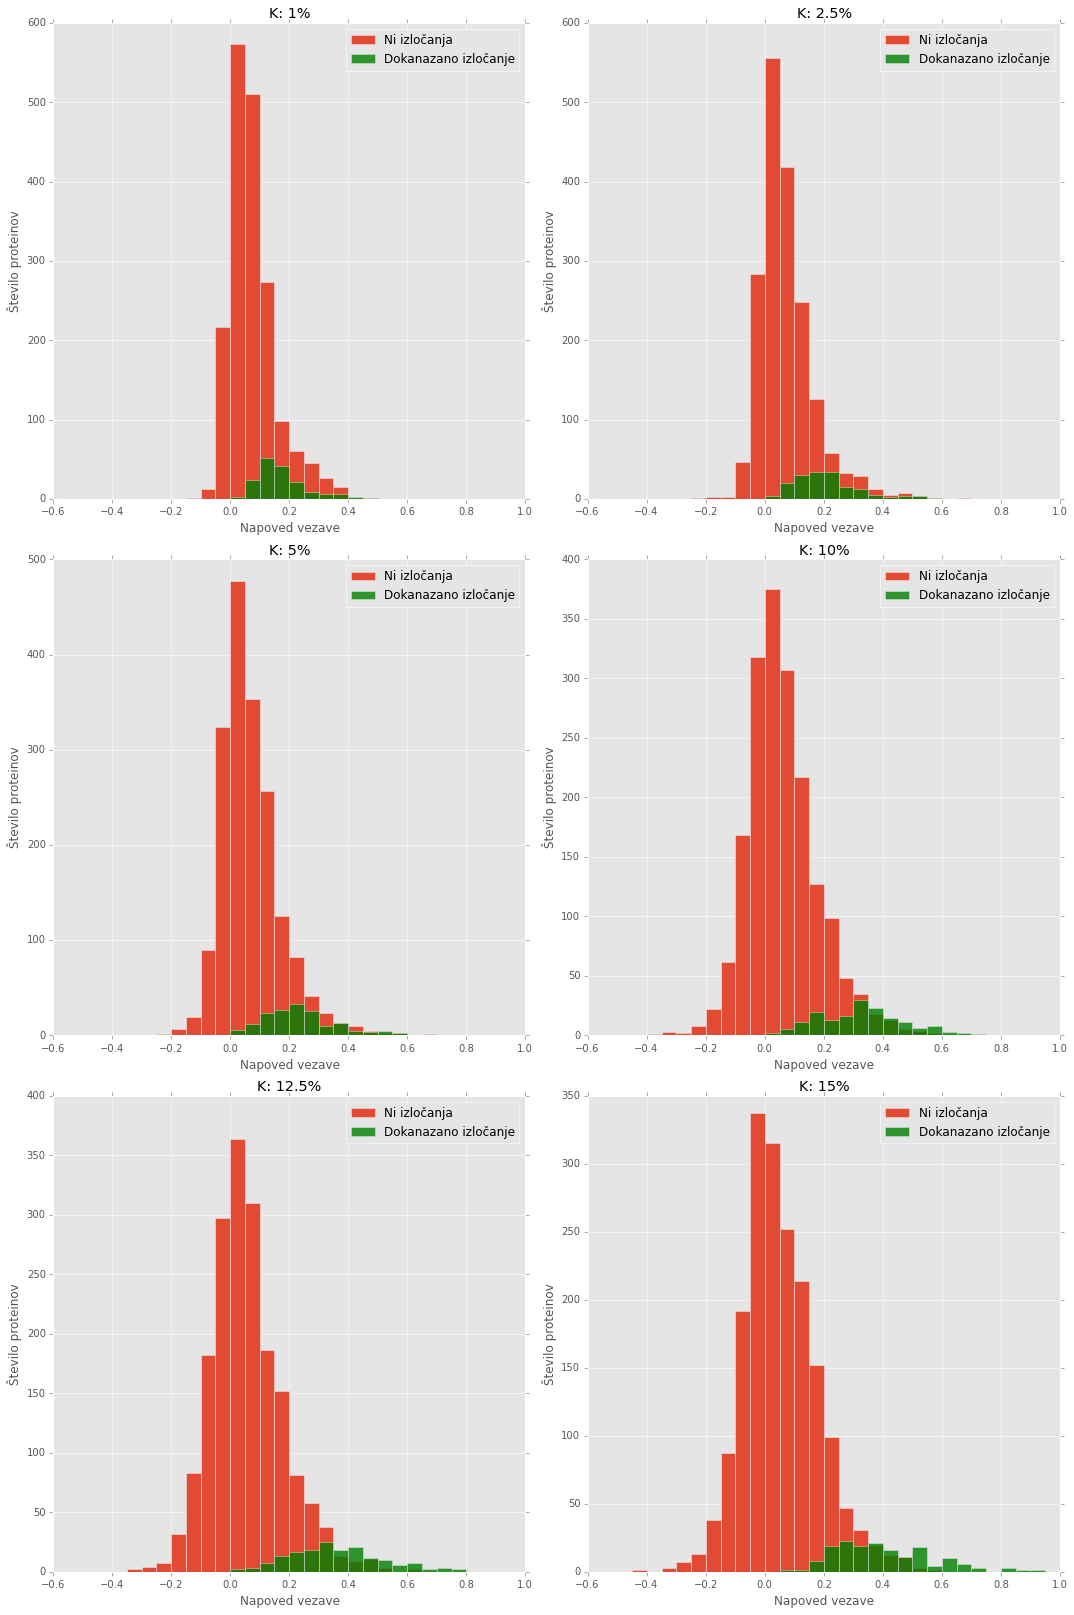

In [6]:
print('Experimental Secretion')
secretionexp_prot = secretionexp_prot.flatten()

secexp_1 = (secretionexp_prot == 1)
secexp_0 = (secretionexp_prot == 0)
bin_range = np.arange(-0.6, 1, 0.05)

ax = plt.subplot('321')
rec_secms = fetc_mat(0, 'SecretionMS')[1,:].flatten()
ax.hist(rec_secms[secexp_0], bins=bin_range , label='Ni izločanja');
ax.hist(rec_secms[secexp_1], bins=bin_range, alpha=0.8, label='Dokanazano izločanje', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('Število proteinov')
ax.legend()
ax.set_title('K: 1%')

ax = plt.subplot('322')
rec_secms = fetc_mat(1, 'SecretionMS')[1,:].flatten()
ax.hist(rec_secms[secexp_0], bins=bin_range, label='Ni izločanja');
ax.hist(rec_secms[secexp_1], bins=bin_range, alpha=0.8, label='Dokanazano izločanje', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('Število proteinov')
ax.legend()
ax.set_title('K: 2.5%')

ax = plt.subplot('323')
rec_secms = fetc_mat(2, 'SecretionMS')[1,:].flatten()
ax.hist(rec_secms[secexp_0], bins=bin_range, label='Ni izločanja');
ax.hist(rec_secms[secexp_1], bins=bin_range, alpha=0.8, label='Dokanazano izločanje', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('Število proteinov')
ax.legend()
ax.set_title('K: 5%')

ax = plt.subplot('324')
rec_secms = fetc_mat(3, 'SecretionMS')[1,:].flatten()
ax.hist(rec_secms[secexp_0], bins=bin_range, label='Ni izločanja');
ax.hist(rec_secms[secexp_1], bins=bin_range, alpha=0.8, label='Dokanazano izločanje', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('Število proteinov')
ax.legend()
ax.set_title('K: 10%')

ax = plt.subplot('325')
rec_secms = fetc_mat(4, 'SecretionMS')[1,:].flatten()
ax.hist(rec_secms[secexp_0], bins=bin_range, label='Ni izločanja');
ax.hist(rec_secms[secexp_1], bins=bin_range, alpha=0.8, label='Dokanazano izločanje', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('Število proteinov')
ax.legend()
ax.set_title('K: 12.5%')

ax = plt.subplot('326')
rec_secms = fetc_mat(5, 'SecretionMS')[1,:].flatten()
ax.hist(rec_secms[secexp_0], bins=bin_range, label='Ni izločanja');
ax.hist(rec_secms[secexp_1], bins=bin_range, alpha=0.8, label='Dokanazano izločanje', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('Število proteinov')
ax.legend()
ax.set_title('K: 15%')


plt.tight_layout()

## HS gene expression

HS gene expression Reconstruction


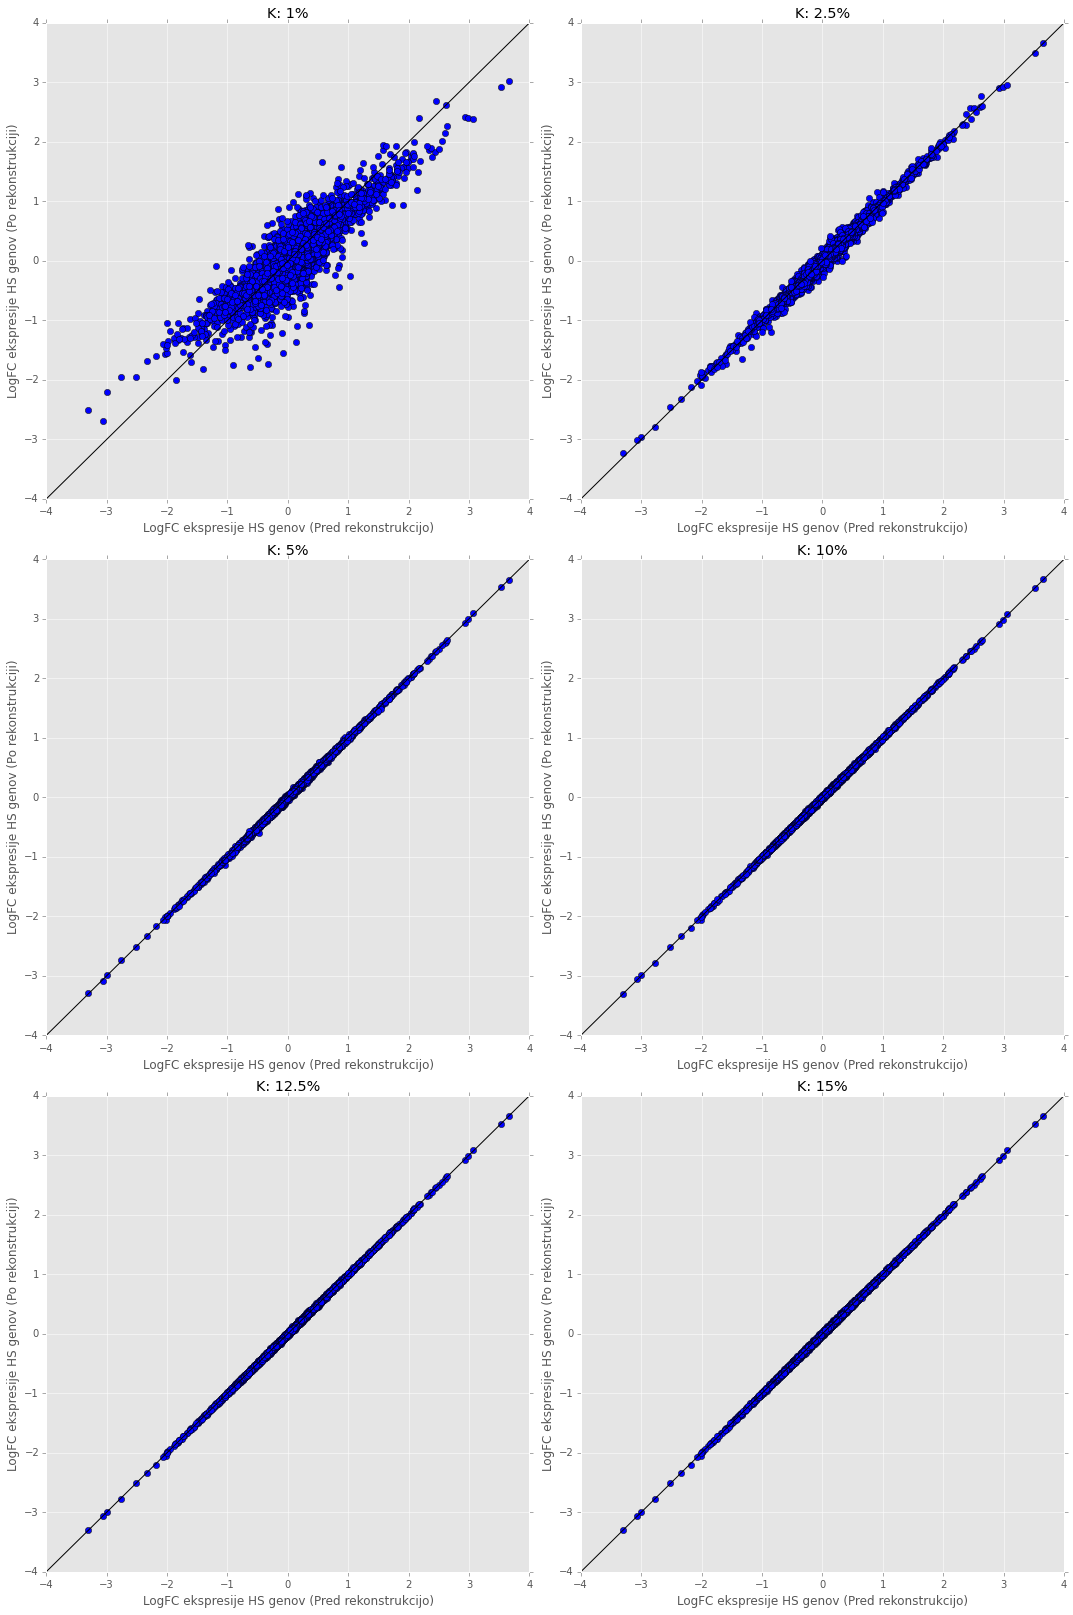

In [7]:
print('HS gene expression Reconstruction')
rna_expression = rna_expression.flatten()

ax = plt.subplot('321')
ax.plot(rna_expression, fetc_mat(0, 'HS_foldchange')[:,1].flatten(), 'bo');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.set_title('K: 1%')
ax.plot([-4,4], [-4,4], '-k')

ax = plt.subplot('322')
ax.plot(rna_expression, fetc_mat(1, 'HS_foldchange')[:,1].flatten(), 'bo');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.set_title('K: 2.5%')
ax.plot([-4,4], [-4,4], '-k')

ax = plt.subplot('323')
ax.plot(rna_expression, fetc_mat(2, 'HS_foldchange')[:,1].flatten(), 'bo');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.set_title('K: 5%')
ax.plot([-4,4], [-4,4], '-k')

ax = plt.subplot('324')
ax.plot(rna_expression, fetc_mat(3, 'HS_foldchange')[:,1].flatten(), 'bo');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.set_title('K: 10%')
ax.plot([-4,4], [-4,4], '-k');

ax = plt.subplot('325')
ax.plot(rna_expression, fetc_mat(3, 'HS_foldchange')[:,1].flatten(), 'bo');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.set_title('K: 12.5%')
ax.plot([-4,4], [-4,4], '-k');

ax = plt.subplot('326')
ax.plot(rna_expression, fetc_mat(3, 'HS_foldchange')[:,1].flatten(), 'bo');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.set_title('K: 15%')
ax.plot([-4,4], [-4,4], '-k');
plt.tight_layout()

RBP Domains


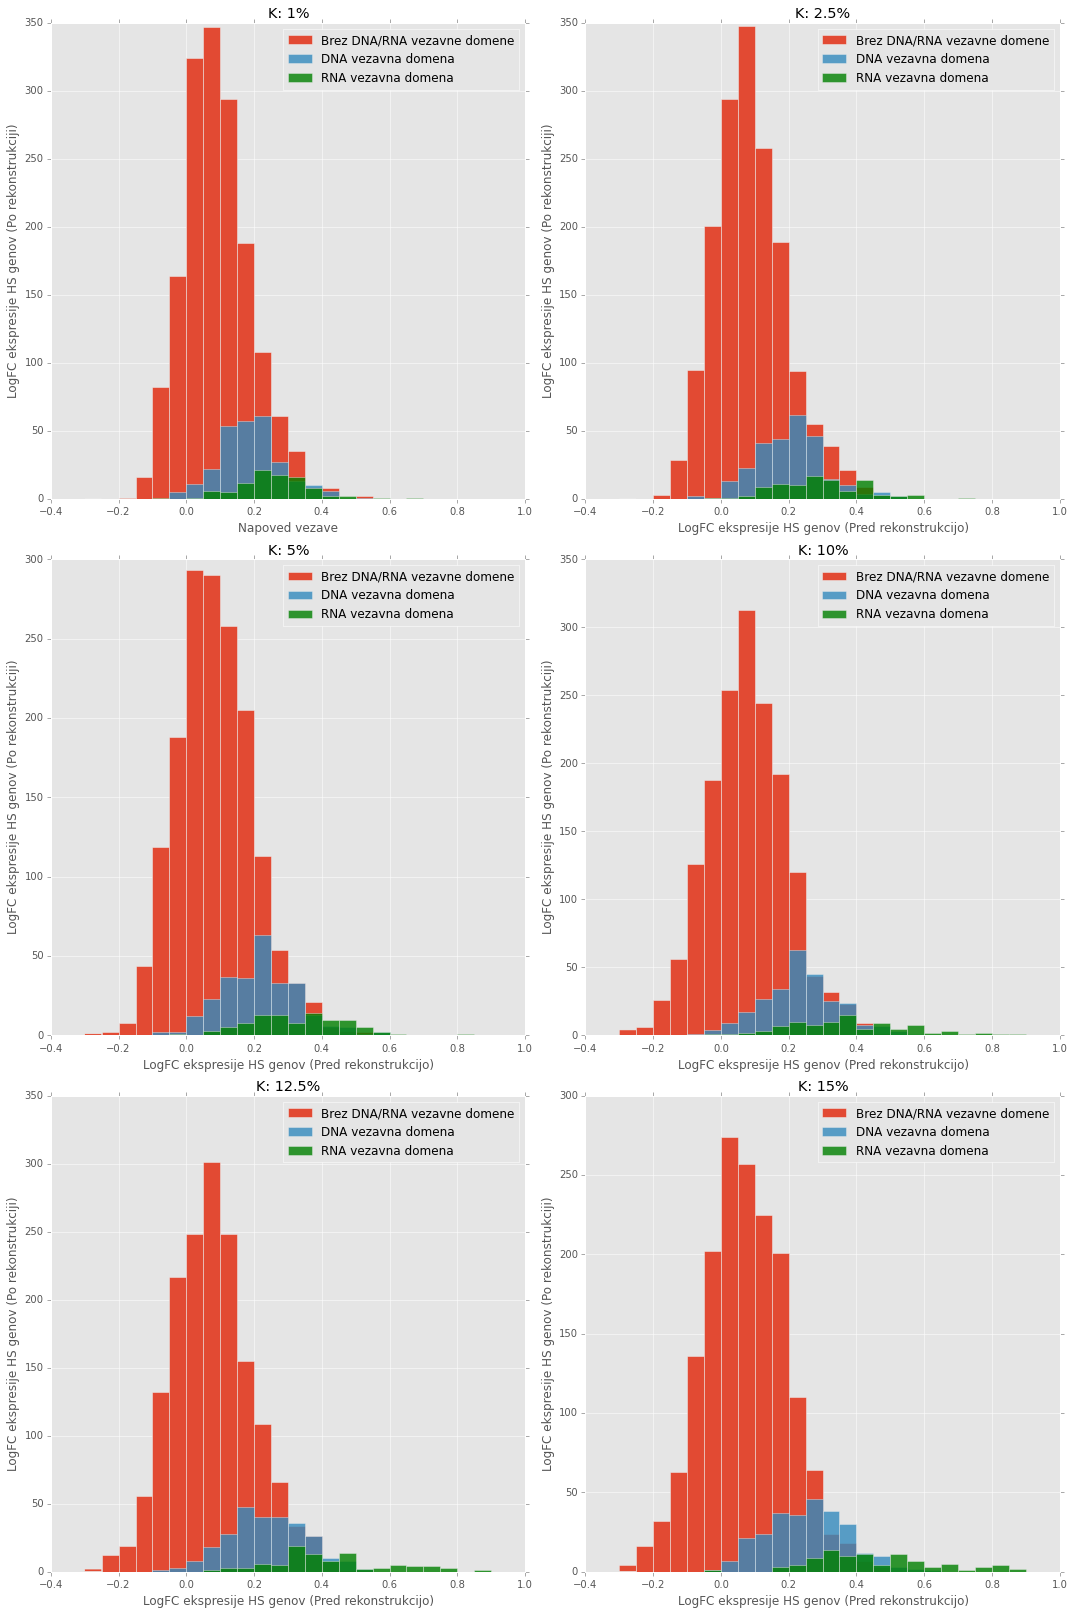

In [8]:
print('RBP Domains')
rbp_prot = rbp_prot.flatten()

bin_range = np.arange(-0.3, 1, 0.05)

rbp_0 = (rbp_prot == 0)
rbp_05 = (rbp_prot == 0.5)
rbp_1 = (rbp_prot == 1)

ax = plt.subplot('321')
rec_rbp = fetc_mat(0, 'RBP_domains')[1,:].flatten()
ax.hist(rec_rbp[rbp_0], bins=bin_range, label='Brez DNA/RNA vezavne domene');
ax.hist(rec_rbp[rbp_05], bins=bin_range, alpha=0.8, label='DNA vezavna domena');
ax.hist(rec_rbp[rbp_1], bins=bin_range, alpha=0.8, label='RNA vezavna domena', color='g');
ax.set_xlabel('Napoved vezave')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.legend()
ax.set_title('K: 1%')

ax = plt.subplot('322')
rec_rbp = fetc_mat(1, 'RBP_domains')[1,:].flatten()
ax.hist(rec_rbp[rbp_0], bins=bin_range, label='Brez DNA/RNA vezavne domene');
ax.hist(rec_rbp[rbp_05], bins=bin_range, alpha=0.8, label='DNA vezavna domena');
ax.hist(rec_rbp[rbp_1], bins=bin_range, alpha=0.8, label='RNA vezavna domena', color='g');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.legend()
ax.set_title('K: 2.5%')

ax = plt.subplot('323')
rec_rbp = fetc_mat(2, 'RBP_domains')[1,:].flatten()
ax.hist(rec_rbp[rbp_0], bins=bin_range, label='Brez DNA/RNA vezavne domene');
ax.hist(rec_rbp[rbp_05], bins=bin_range, alpha=0.8, label='DNA vezavna domena');
ax.hist(rec_rbp[rbp_1], bins=bin_range, alpha=0.8, label='RNA vezavna domena', color='g');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.legend()
ax.set_title('K: 5%')

ax = plt.subplot('324')
rec_rbp = fetc_mat(3, 'RBP_domains')[1,:].flatten()
ax.hist(rec_rbp[rbp_0], bins=bin_range, label='Brez DNA/RNA vezavne domene');
ax.hist(rec_rbp[rbp_05], bins=bin_range, alpha=0.8, label='DNA vezavna domena');
ax.hist(rec_rbp[rbp_1], bins=bin_range, alpha=0.8, label='RNA vezavna domena', color='g');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.legend()
ax.set_title('K: 10%')

ax = plt.subplot('325')
rec_rbp = fetc_mat(4, 'RBP_domains')[1,:].flatten()
ax.hist(rec_rbp[rbp_0], bins=bin_range, label='Brez DNA/RNA vezavne domene');
ax.hist(rec_rbp[rbp_05], bins=bin_range, alpha=0.8, label='DNA vezavna domena');
ax.hist(rec_rbp[rbp_1], bins=bin_range, alpha=0.8, label='RNA vezavna domena', color='g');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.legend()
ax.set_title('K: 12.5%')

ax = plt.subplot('326')
rec_rbp = fetc_mat(5, 'RBP_domains')[1,:].flatten()
ax.hist(rec_rbp[rbp_0], bins=bin_range, label='Brez DNA/RNA vezavne domene');
ax.hist(rec_rbp[rbp_05], bins=bin_range, alpha=0.8, label='DNA vezavna domena');
ax.hist(rec_rbp[rbp_1], bins=bin_range, alpha=0.8, label='RNA vezavna domena', color='g');
ax.set_xlabel('LogFC ekspresije HS genov (Pred rekonstrukcijo)')
ax.set_ylabel('LogFC ekspresije HS genov (Po rekonstrukciji)')
ax.legend()
ax.set_title('K: 15%')

plt.tight_layout()

## Distribution comparrison

In [9]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot_2samples

### SignalP Q-Q plots

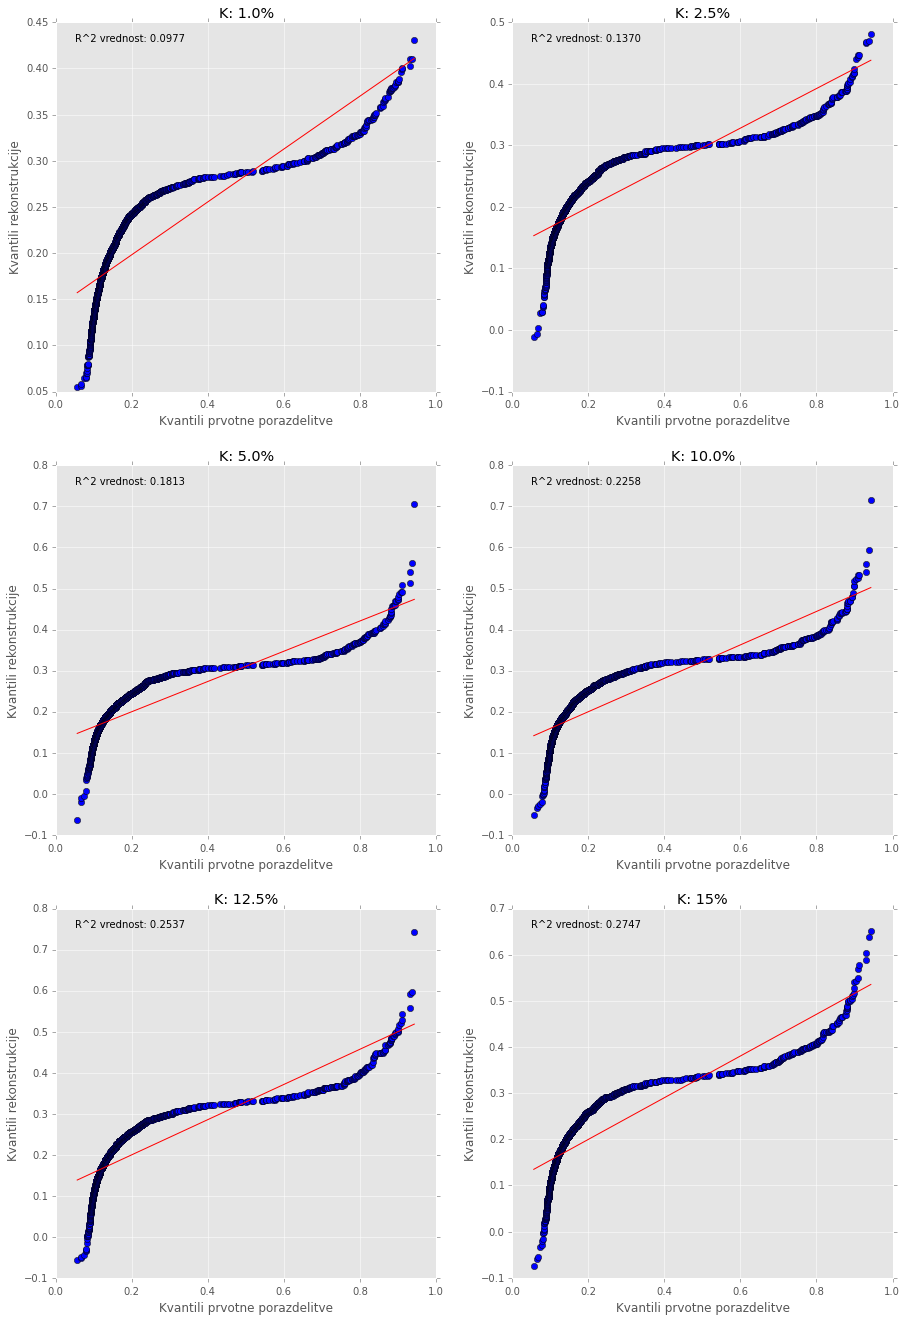

In [10]:
Ks = [1., 2.5, 5., 10., 12.5, 15]
for i, k  in zip(range(6), Ks):
    x = secretion_prot
    y = fetc_mat(i, 'signalP')[1,:]
    ax1 = plt.subplot(321 + i)
    fig = qqplot_2samples( y, x, xlabel='Kvantili prvotne porazdelitve', ylabel='Kvantili rekonstrukcije', line='r', ax = ax1);

    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    ax1.text(0.05, 0.95,'R^2 vrednost: {:.4f}'.format(r_value**2), transform=ax1.transAxes)
    ax1.set_title('K: {}%'.format(k))

### CatRapid Q-Q plots

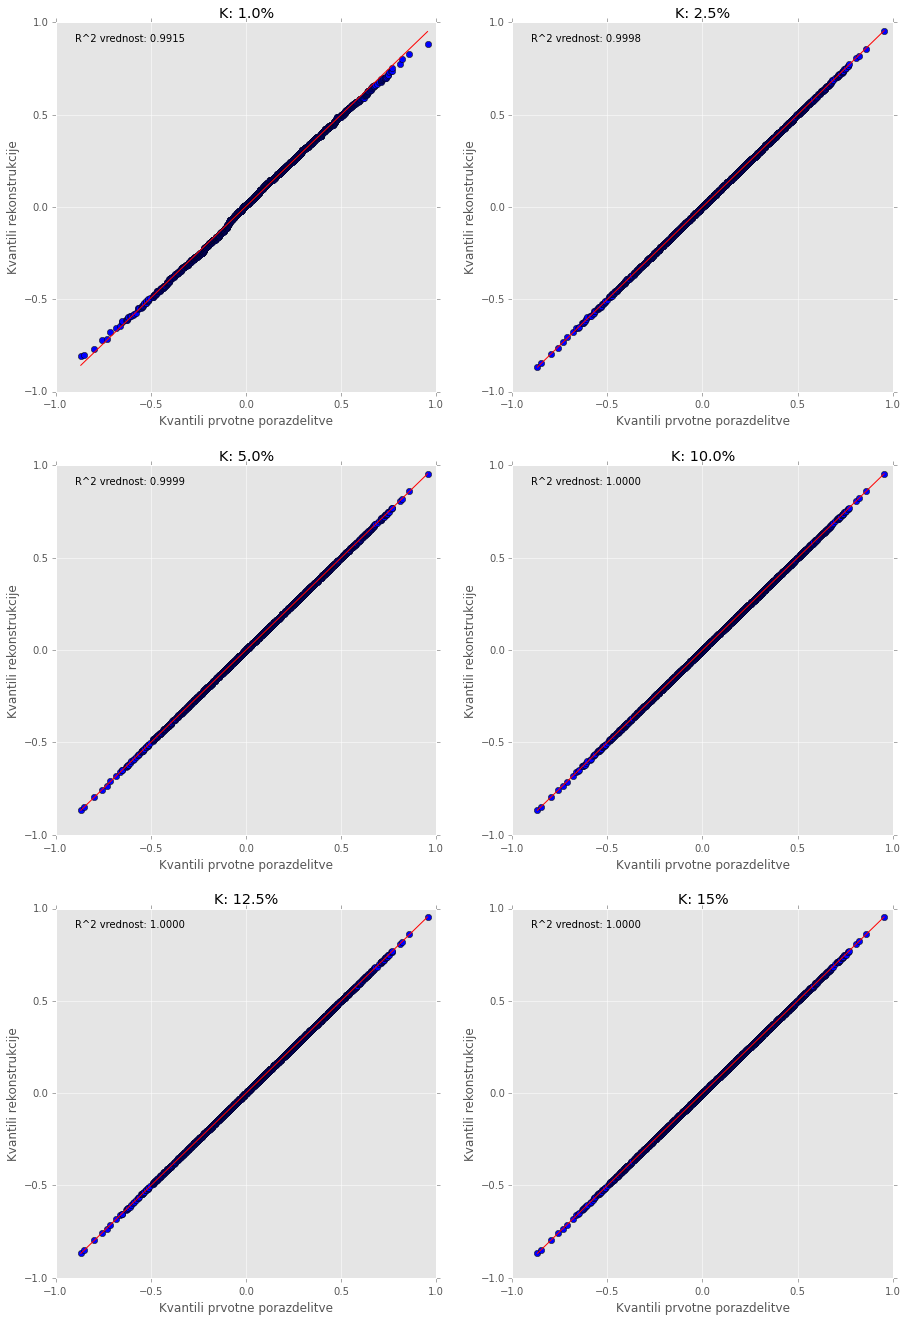

In [11]:
Ks = [1., 2.5, 5., 10., 12.5, 15]
for i, k  in zip(range(6), Ks):
    x = prot_rna.mean(axis=1)
    y = fetc_mat(i, 'catrapid').mean(axis=1)
    ax1 = plt.subplot(321 + i)
    fig = qqplot_2samples( y, x, xlabel='Kvantili prvotne porazdelitve', ylabel='Kvantili rekonstrukcije', line='r', ax = ax1);

    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    ax1.text(0.05, 0.95,'R^2 vrednost: {:.4f}'.format(r_value**2), transform=ax1.transAxes)
    ax1.set_title('K: {}%'.format(k))

### Q-Q PLOT: SPREMEMBA IZRAŽANJA GENOV (HS)

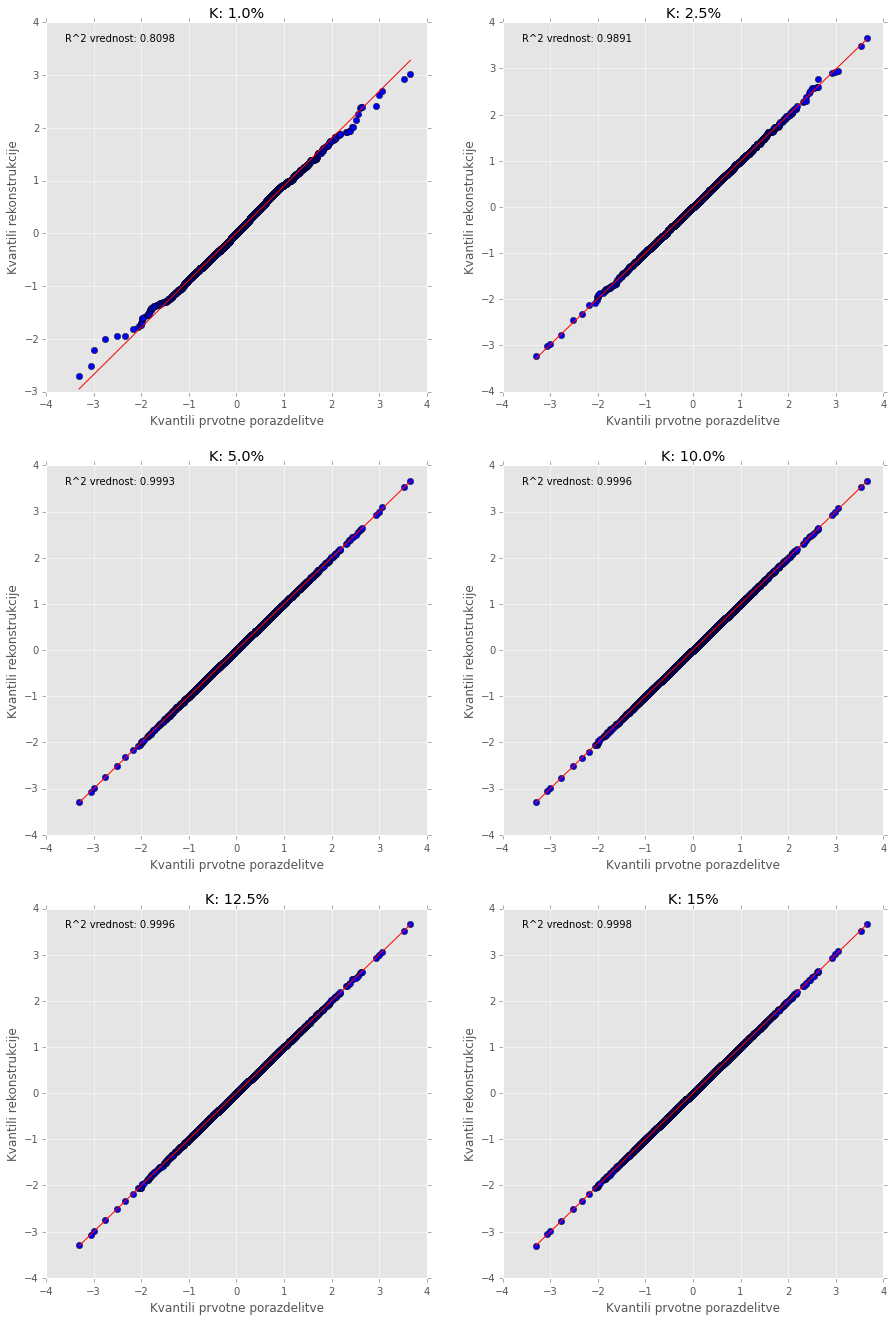

In [12]:
Ks = [1., 2.5, 5., 10., 12.5, 15]
for i, k  in zip(range(6), Ks):
    x = rna_expression.flatten()
    y = fetc_mat(i, 'HS_foldchange')[:,1].flatten()
    ax1 = plt.subplot(321 + i)
    fig = qqplot_2samples( y, x, xlabel='Kvantili prvotne porazdelitve', ylabel='Kvantili rekonstrukcije', line='r', ax = ax1);

    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    ax1.text(0.05, 0.95,'R^2 vrednost: {:.4f}'.format(r_value**2), transform=ax1.transAxes)
    ax1.set_title('K: {}%'.format(k))

# Candidate list



Formula za izbor:

$$ Protein_{rank} = rank(CatRapid_{prispevek} + RBP_{prispevek}) $$

Pri čemer:
$$ CatRapid_{prispevek} = \frac{n - rank(povprečen\ Z{-}score\ proteina)}{n}$$
in
$$ RBP_{prispevek} = RBP\ vrednost$$


$n$ je število analiziralo število proteinov.

Izbiramo med kandidati ki so med top $ 9\% $ po SignalP oziroma Sekrecijski vrednosti. V prvotnih podatkih je $166\ (8.29\%)$  proteinov ki so bili detektirani v MS analizi in prav tako je $ 166 $  takih, ki imajo signalP vrednost $ \ge 0.51 $  




In [13]:
import pandas as pd

In [14]:
# set up dataframe
my_df = pd.DataFrame()

# description
prot_names = list(np.array(np.load('../matrices/pickles/order/AAprot.pkl', 'rb'))[selection])
my_df['Description'] = np.array(np.load('../matrices/pickles/order/AAprot_description.npy'))[selection]
my_df.index = prot_names


# add catrapid 
my_df['mean_Catrapid'] = fetc_mat(2, 'catrapid').mean(axis=1)
my_df['rank_Catrapid'] = my_df['mean_Catrapid'].rank(ascending=False)
my_df['domain_score'] = fetc_mat(2, 'RBP_domains')[1,:].flatten()

 

In [15]:
signalp_quantile = 0.91 # 1 - (secretion_prot >= 0.51).sum() / secretion_prot.size
secretion_exp_quantile = 0.91 # 1 - (secretionexp_prot == 1).sum() / secretionexp_prot.size

signalP = fetc_mat(2, 'signalP')[1,:].flatten()
secretion = fetc_mat(2, 'SecretionMS')[1,:].flatten()

my_df['Secretion_nonfused'] = np.logical_or(secretion_prot >= 0.51, secretionexp_prot == 1)
my_df['Secretion_fused'] = ((secretion >= pd.Series(secretion).quantile(secretion_exp_quantile)) | 
                            (signalP >= pd.Series(signalP).quantile(signalp_quantile)))

In [16]:
n_elements = len(prot_names)
my_df['Orignial_rank'] = np.array(pd.Series(rbp_prot + ((len(prot_names) - prot_rna.mean(axis=1)) / len(prot_names))).rank(ascending=False))

my_df['final_score'] = my_df['domain_score'] + ((len(prot_names) - my_df['rank_Catrapid'] ) / len(prot_names))
my_df['final_rank'] = my_df['final_score'].rank(ascending=False)


In [ ]:
def make_output(results_files, percents):
    """
    Makes prioritization tables and saves them.
    """
    # quantile selection
    signalp_quantile = 1 - (secretion_prot >= 0.51).sum() / secretion_prot.size
    secretion_exp_quantile = 1 - (secretionexp_prot == 1).sum() / secretionexp_prot.size
    
    # Setup
    all_dfs = [pd.DataFrame() for i in range(len(results_files))]
    
    
    prot_names = list(np.array(np.load('../matrices/pickles/order/AAprot.pkl', 'rb'))[selection])
    original_rank = np.array(pd.Series(rbp_prot + ((len(prot_names) - prot_rna.mean(axis=1)) / len(prot_names))).rank(ascending=False))
    
    # Joined data frame
    joined_df = pd.DataFrame()
    joined_df['Description'] = np.array(np.load('../matrices/pickles/order/AAprot_description.npy'))[selection]
    joined_df.index = prot_names
    joined_df['Secretion_orignial'] = np.logical_or(secretion_prot >= 0.51, secretionexp_prot == 1)
    joined_df['Orignial_rank'] = original_rank
    
    for my_df, idx, percent in zip(all_dfs, range(len(all_dfs)), percents):
        # names and description
        my_df['Description'] = np.array(np.load('../matrices/pickles/order/AAprot_description.npy'))[selection]
        my_df.index = prot_names
        
        # Z-score and Domains 
        my_df['mean_Catrapid'] = fetc_mat(idx, 'catrapid').mean(axis=1)
        my_df['rank_Catrapid'] = my_df['mean_Catrapid'].rank(ascending=False)
        my_df['domain_score'] = fetc_mat(idx, 'RBP_domains')[1,:].flatten()
        
        # Secretion
        signalP = fetc_mat(idx, 'signalP')[1,:].flatten()
        secretion = fetc_mat(idx, 'SecretionMS')[1,:].flatten()
        
        my_df['Secretion_nonfused'] = np.logical_or(secretion_prot >= 0.51, secretionexp_prot == 1)
        my_df['Secretion_fused'] = ((secretion >= pd.Series(secretion).quantile(secretion_exp_quantile)) | 
                                   (signalP >= pd.Series(signalP).quantile(signalp_quantile)))
        
        # Final calculations
        my_df['Orignial_rank'] = original_rank
        my_df['final_score'] = my_df['domain_score'] + ((len(prot_names) - my_df['rank_Catrapid'] ) / len(prot_names))
        final_rank = my_df['final_score'].rank(ascending=False)
        
        my_df['final_rank'] = final_rank

        joined_df['Secretion {}'.format(percent)] = ((secretion >= pd.Series(secretion).quantile(secretion_exp_quantile)) | 
                                            (signalP >= pd.Series(signalP).quantile(signalp_quantile)))
        joined_df['Rank {}'.format(percent)] = final_rank
        
        my_df.to_csv('./candidate_list/Results_{}.tsv'.format(percent), sep='\t')
    
    joined_df.to_csv('./candidate_list/Merged_results.tsv', sep='\t')

In [ ]:
make_output(results_files, [0.01, 0.025, 0.05, 0.1, 0.125, 0.15])